In [18]:
# Import essential libraries
import numpy as np
import scipy as snp
import scipy.ndimage as ndimage
import matplotlib.pyplot as plt
import matplotlib as mplt

In [19]:
testdata=my_data = np.genfromtxt('Test2_cal_10.3.csv', delimiter=',')
testdata=testdata[1:]
print(testdata)

[[118. 170. 189. ... 178. 578. 600.]
 [118. 170. 189. ... 179. 578. 600.]
 [118. 170. 189. ... 179. 578. 600.]
 ...
 [608. 627. 397. ... 400. 580. 597.]
 [608. 627. 396. ... 403. 580. 597.]
 [608. 627. 396. ... 406. 580. 597.]]


# Sensor0 Signal over ambient value

[-0.06780993 58.07691795]


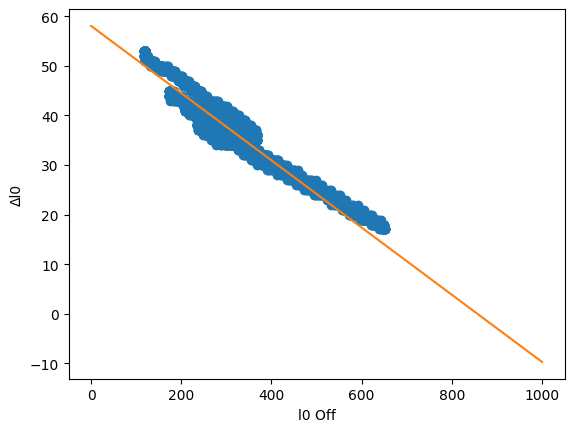

In [20]:
tmp=np.transpose(testdata)
v=np.polyfit(tmp[0],(tmp[1]-tmp[0]),1)
plt.plot(tmp[0],(tmp[1]-tmp[0]),'o')
print(v)
plt.plot([0,1000],[v[1],v[1]+v[0]*1000])
# Add axis labels
plt.xlabel('l0 Off')
plt.ylabel('Δl0')
plt.show()
s0v=v[0]

## Compensation

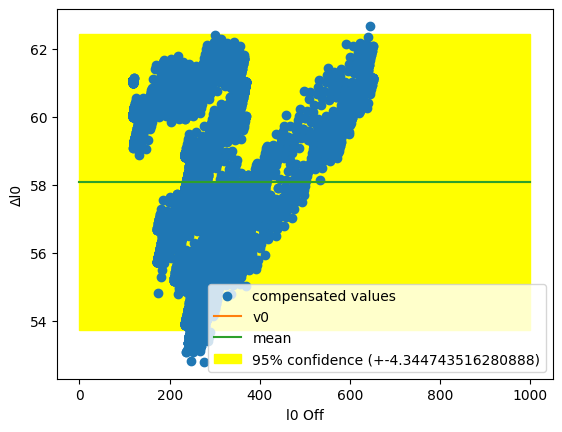

In [21]:
s0=tmp[0:2].copy()
s0[1]=s0[1]-s0[0]
s0[1]=s0[1]-s0[0]*v[0]
s=1.96*np.std(s0[1])
m=np.mean(s0[1])
fig,ax=plt.subplots()
ax.plot(s0[0],s0[1],'o')
plt.plot([0,1000],[v[1],v[1]])
plt.plot([0,1000],[m,m])
ax.add_patch(mplt.patches.Rectangle((0,m-s),1000,s*2,color="yellow"))
plt.legend(["compensated values","v0","mean",f"95% confidence (+-{s})"])
# Add axis labels
plt.xlabel('l0 Off')
plt.ylabel('Δl0')
plt.show()

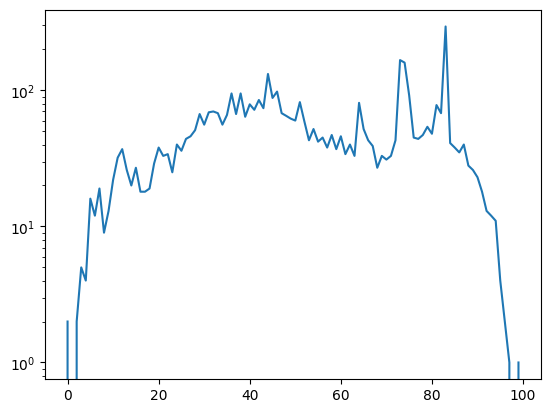

In [22]:
h=np.histogram(s0[1],bins=100)[0]
plt.plot(np.arange(100),h,)
plt.yscale("log")
plt.show()

## Histogram over ambient light levels

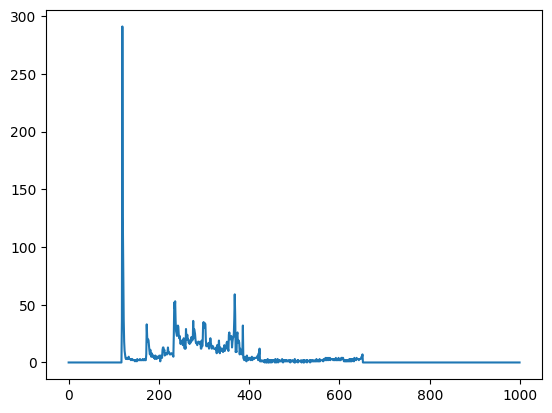

In [23]:
h=np.histogram(s0[0],bins=1000,range=(0,1000))[0]
plt.plot(np.arange(1000),h)
plt.show()

# Sensor1 Signal over ambient value

[-0.08560981 77.34303755]


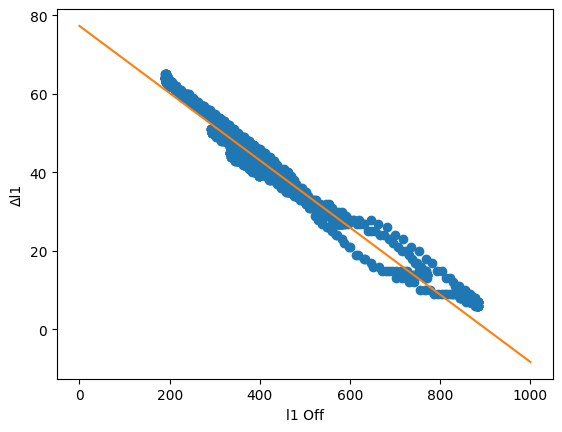

In [24]:
v=np.polyfit(tmp[2],(tmp[3]-tmp[2]),1)
plt.plot(tmp[2],(tmp[3]-tmp[2]),'o')
print(v)
plt.plot([0,1000],[v[1],v[1]+v[0]*1000])# Add axis labels
plt.xlabel('l1 Off')
plt.ylabel('Δl1')
plt.show()

s1v=v[0]


## Compensation

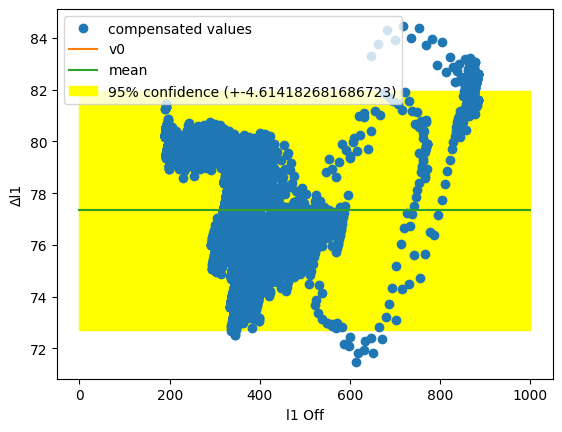

In [25]:
s0=tmp[2:4].copy()
s0[1]=s0[1]-s0[0]
s0[1]=s0[1]-s0[0]*v[0]
s=1.96*np.std(s0[1])
m=np.mean(s0[1])
fig,ax=plt.subplots()
ax.plot(s0[0],s0[1],'o')
plt.plot([0,1000],[v[1],v[1]])
plt.plot([0,1000],[m,m])
ax.add_patch(mplt.patches.Rectangle((0,m-s),1000,s*2,color="yellow"))
plt.legend(["compensated values","v0","mean",f"95% confidence (+-{s})"])
plt.xlabel('l1 Off')
plt.ylabel('Δl1')
plt.show()

## Histogram over ambient light levels

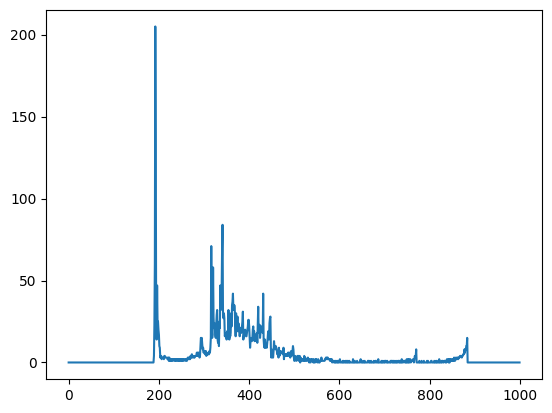

In [26]:
h=np.histogram(s0[0],bins=1000,range=(0,1000))[0]
plt.plot(np.arange(1000),h)
plt.show()

# Sensor2 Signal over ambient value

[-0.09001046 81.27503066]


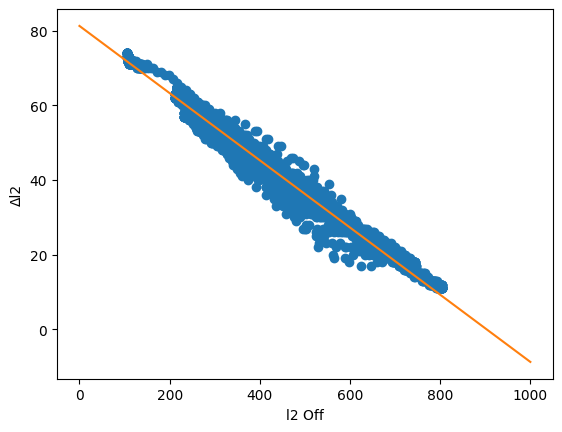

In [27]:
v=np.polyfit(tmp[4],(tmp[5]-tmp[4]),1)
plt.plot(tmp[4],(tmp[5]-tmp[4]),'o')
print(v)
plt.plot([0,1000],[v[1],v[1]+v[0]*1000])
plt.xlabel('l2 Off')
plt.ylabel('Δl2')
plt.show()
s2v=v[0]


## Compensation

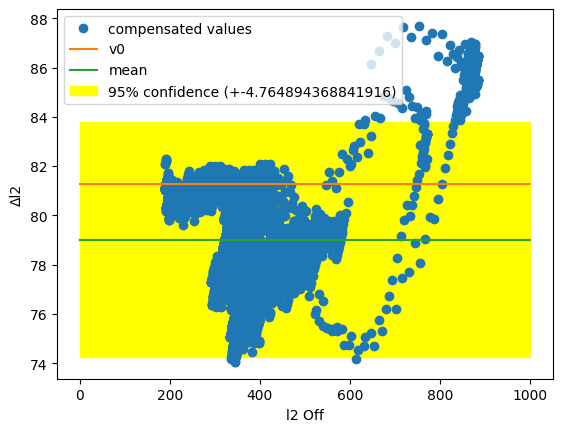

In [28]:
s0=tmp[2:4].copy()
s0[1]=s0[1]-s0[0]
s0[1]=s0[1]-s0[0]*v[0]
s=1.96*np.std(s0[1])
m=np.mean(s0[1])
fig,ax=plt.subplots()
ax.plot(s0[0],s0[1],'o')
plt.plot([0,1000],[v[1],v[1]])
plt.plot([0,1000],[m,m])
ax.add_patch(mplt.patches.Rectangle((0,m-s),1000,s*2,color="yellow"))
plt.legend(["compensated values","v0","mean",f"95% confidence (+-{s})"])
plt.xlabel('l2 Off')
plt.ylabel('Δl2')
plt.show()

## Histogram over ambient light levels

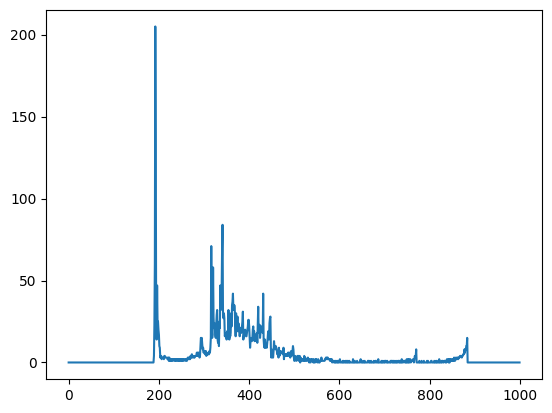

In [29]:
h=np.histogram(s0[0],bins=1000,range=(0,1000))[0]
plt.plot(np.arange(1000),h)
plt.show()

# Sensor Calibration Values:

In [30]:
print(f"Sensor 0 = {s0v}\nSensor 1 = {s1v}\nSensor 2 = {s2v}\n")

Sensor 0 = -0.06780992625744002
Sensor 1 = -0.08560980873824522
Sensor 2 = -0.09001045583834325



# Deformation Calibration

In [31]:
testdata2=my_data = np.genfromtxt('Test1_10.3.csv', delimiter=',')
testdata2=testdata2[1:]
#print(testdata2)

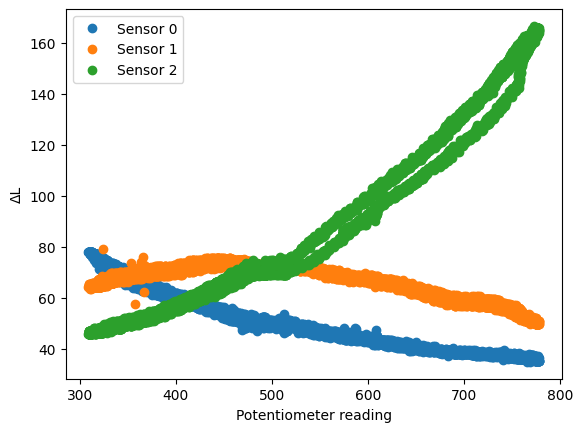

In [32]:
t=np.transpose(testdata2)
# get compensated Sensor Data
s0 = t[0:2].copy()
s0[1]=s0[1]-s0[0]
s0[1]=s0[1]-s0[0]*s0v

s1 = t[2:4].copy()
s1[1]=s1[1]-s1[0]
s1[1]=s1[1]-s1[0]*s1v

s2 = t[4:6].copy()
s2[1]=s2[1]-s2[0]
s2[1]=s2[1]-s2[0]*s2v

pot = (t[6].copy()+t[7].copy())*0.5

plt.plot(pot,s0[1],"o")
plt.plot(pot,s1[1],"o")
plt.plot(pot,s2[1],"o")
plt.legend(["Sensor 0","Sensor 1","Sensor 2"])
plt.xlabel('Potentiometer reading')
plt.ylabel('ΔL')
plt.show()



<function matplotlib.pyplot.show(close=None, block=None)>

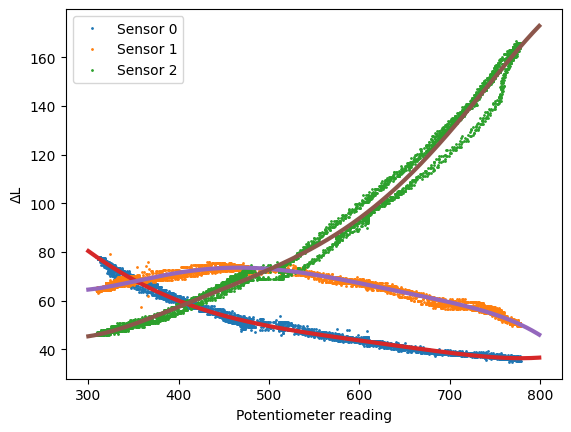

In [33]:
x=np.arange(300,800)
sp0=np.polyfit(pot,s0[1],5)
plt.plot(pot,s0[1],"o",markersize=1)

sp1=np.polyfit(pot,s1[1],5)
plt.plot(pot,s1[1],"o",markersize=1)

sp2=np.polyfit(pot,s2[1],5)
plt.plot(pot,s2[1],"o",markersize=1)

#Polynomial fit
s0pt=np.polynomial.Polynomial(np.flip(sp0))(x)
plt.plot(x,s0pt,linewidth=3)
s1pt=np.polynomial.Polynomial(np.flip(sp1))(x)
plt.plot(x,s1pt,linewidth=3)
s2pt=np.polynomial.Polynomial(np.flip(sp2))(x)
plt.plot(x,s2pt,linewidth=3)

plt.legend(["Sensor 0","Sensor 1","Sensor 2"],fontsize =10)
plt.xlabel('Potentiometer reading')
plt.ylabel('ΔL')
plt.show

In [34]:
xrange=max(x)-min(x)+1
print(xrange)

500


In [35]:
s0m=s0pt.copy()
s0s=s0pt.copy()
s0c=s0pt.copy()
s0w=s0pt.copy()
s1m=s1pt.copy()
s1s=s1pt.copy()
s1c=s1pt.copy()
s2m=s2pt.copy()
s2s=s2pt.copy()
s2c=s2pt.copy()
for i in range(xrange):
    con=np.equal(pot,x[i])
    tmp0=np.extract(con,s0[1])
    tmp1=np.extract(con,s1[1])
    tmp2=np.extract(con,s2[1])
    if(len(tmp0)==0):
        s0m[i]=s0pt[i]
        s1m[i]=s1pt[i]
        s2m[i]=s2pt[i]
    else:
        s0m[i]=np.mean(tmp0)
        s1m[i]=np.mean(tmp1)
        s2m[i]=np.mean(tmp2)


s0m=ndimage.gaussian_filter1d(s0m,4)
s1m=ndimage.gaussian_filter1d(s1m,4)
s2m=ndimage.gaussian_filter1d(s2m,4)

for i in range(xrange):
    con=np.equal(pot,x[i])
    tmp0=np.extract(con,s0[1])
    tmp1=np.extract(con,s1[1])
    tmp2=np.extract(con,s2[1])
    if(len(tmp0)==0):
        s0s[i]=0
        s0w[i]=0
        s0c[i]=0
        s1s[i]=0
        s1c[i]=0
        s2s[i]=0
        s2c[i]=0
    else:
        s0s[i]=np.sqrt(np.average((tmp0-s0m[i])**2))
        s0c[i]=np.sqrt(np.average((tmp0-s0pt[i])**2))
        s1s[i]=np.sqrt(np.average((tmp1-s1m[i])**2))
        s1c[i]=np.sqrt(np.average((tmp1-s1pt[i])**2))
        s2s[i]=np.sqrt(np.average((tmp2-s2m[i])**2))
        s2c[i]=np.sqrt(np.average((tmp2-s2pt[i])**2))
        s0w[i]=len(tmp0)

sm=np.sum(s0s)
s0s=s0s*s0w
s0s=s0s*sm/np.sum(s0s)
s0s=ndimage.gaussian_filter1d(s0s,4)

sm=np.sum(s0c)
s0c=s0c*s0w
s0c=s0c*sm/np.sum(s0c)
s0c=ndimage.gaussian_filter1d(s0c,4)

sm=np.sum(s1s)
s1s=s1s*s0w
s1s=s1s*sm/np.sum(s1s)
s1s=ndimage.gaussian_filter1d(s1s,4)

sm=np.sum(s1c)
s1c=s1c*s0w
s1c=s1c*sm/np.sum(s1c)
s1c=ndimage.gaussian_filter1d(s1c,4)

sm=np.sum(s2s)
s2s=s2s*s0w
s2s=s2s*sm/np.sum(s2s)
s2s=ndimage.gaussian_filter1d(s2s,4)

sm=np.sum(s2c)
s2c=s2c*s0w
s2c=s2c*sm/np.sum(s2c)
s2c=ndimage.gaussian_filter1d(s2c,4)







In [36]:
# s0m=s0pt.copy()
# s0s=s0pt.copy()
# s0c=s0pt.copy()
# s0w=s0pt.copy()
# s1m=s1pt.copy()
# s1s=s1pt.copy()
# s1c=s1pt.copy()
# s2m=s2pt.copy()
# s2s=s2pt.copy()
# s2c=s2pt.copy()
# for i in range(500):
#     con=np.equal(pot,x[i])
#     tmp0=np.extract(con,s0[1])
#     tmp1=np.extract(con,s1[1])
#     tmp2=np.extract(con,s2[1])
#     if(len(tmp0)==0):
#         s0m[i]=s0pt[i]
#         s1m[i]=s1pt[i]
#         s2m[i]=s2pt[i]
#     else:
#         s0m[i]=np.mean(tmp0)
#         s1m[i]=np.mean(tmp1)
#         s2m[i]=np.mean(tmp2)


# s0m=ndimage.gaussian_filter1d(s0m,4)
# s1m=ndimage.gaussian_filter1d(s1m,4)
# s2m=ndimage.gaussian_filter1d(s2m,4)

# for i in range(500):
#     con=np.equal(pot,x[i])
#     tmp0=np.extract(con,s0[1])
#     tmp1=np.extract(con,s1[1])
#     tmp2=np.extract(con,s2[1])
#     if(len(tmp0)==0):
#         s0s[i]=0
#         s0w[i]=0
#         s0c[i]=0
#         s1s[i]=0
#         s1c[i]=0
#         s2s[i]=0
#         s2c[i]=0
#     else:
#         s0s[i]=np.sqrt(np.average((tmp0-s0m[i])**2))
#         s0c[i]=np.sqrt(np.average((tmp0-s0pt[i])**2))
#         s1s[i]=np.sqrt(np.average((tmp1-s1m[i])**2))
#         s1c[i]=np.sqrt(np.average((tmp1-s1pt[i])**2))
#         s2s[i]=np.sqrt(np.average((tmp2-s2m[i])**2))
#         s2c[i]=np.sqrt(np.average((tmp2-s2pt[i])**2))
#         s0w[i]=len(tmp0)

# sm=np.sum(s0s)
# s0s=s0s*s0w
# s0s=s0s*sm/np.sum(s0s)
# s0s=ndimage.gaussian_filter1d(s0s,4)

# sm=np.sum(s0c)
# s0c=s0c*s0w
# s0c=s0c*sm/np.sum(s0c)
# s0c=ndimage.gaussian_filter1d(s0c,4)

# sm=np.sum(s1s)
# s1s=s1s*s0w
# s1s=s1s*sm/np.sum(s1s)
# s1s=ndimage.gaussian_filter1d(s1s,4)

# sm=np.sum(s1c)
# s1c=s1c*s0w
# s1c=s1c*sm/np.sum(s1c)
# s1c=ndimage.gaussian_filter1d(s1c,4)

# sm=np.sum(s2s)
# s2s=s2s*s0w
# s2s=s2s*sm/np.sum(s2s)
# s2s=ndimage.gaussian_filter1d(s2s,4)

# sm=np.sum(s2c)
# s2c=s2c*s0w
# s2c=s2c*sm/np.sum(s2c)
# s2c=ndimage.gaussian_filter1d(s2c,4)







### Uncertainty around mean

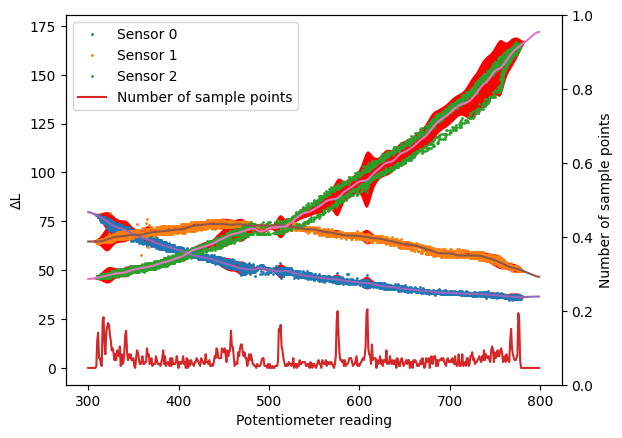

In [37]:
fig , ax =plt.subplots()
ax.plot(pot,s0[1],"o",markersize=1)
ax.plot(pot,s1[1],"o",markersize=1)
ax.plot(pot,s2[1],"o",markersize=1)

ax.plot(x,s0w)
plt.legend(["Sensor 0","Sensor 1","Sensor 2", "Number of sample points"])

ax.plot(x,s0m)
ax.plot(x,s1m)
ax.plot(x,s2m)

ax.fill_between(x,s0m-(s0s*2),s0m+(s0s*2),facecolor='red')
ax.fill_between(x,s1m-(s1s*2),s1m+(s1s*2),facecolor='red')
ax.fill_between(x,s2m-(s2s*2),s2m+(s2s*2),facecolor='red')


plt.xlabel('Potentiometer reading')
plt.ylabel('ΔL')

# create the second y-axis
ax_i = ax.twinx()
ax_i.set_ylabel('Number of sample points')



plt.show()


### Uncertainty around curve

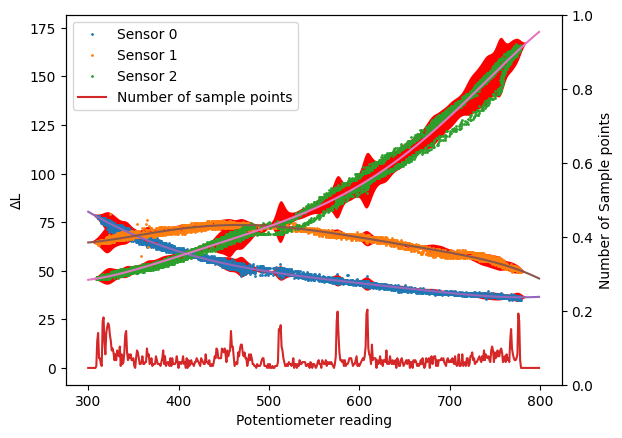

In [38]:
fig , ax2 =plt.subplots()
ax2.plot(pot,s0[1],"o",markersize=1)

ax2.plot(pot,s1[1],"o",markersize=1)

ax2.plot(pot,s2[1],"o",markersize=1)

ax2.plot(x,s0w)
plt.legend(["Sensor 0","Sensor 1","Sensor 2", "Number of sample points"])

ax2.plot(x,s0pt)
ax2.plot(x,s1pt)
ax2.plot(x,s2pt)
ax2.fill_between(x,s0pt-(s0c*2),s0pt+(s0c*2),facecolor='red')
ax2.fill_between(x,s1pt-(s1c*2),s1pt+(s1c*2),facecolor='red')
ax2.fill_between(x,s2pt-(s2c*2),s2pt+(s2c*2),facecolor='red')



plt.xlabel('Potentiometer reading')
plt.ylabel('ΔL')

# create the second y-axis
ax_i = ax2.twinx()
ax_i.set_ylabel('Number of Sample points')

plt.show()

### Aproximate Uncerainty (Weighted by number of datapoints)

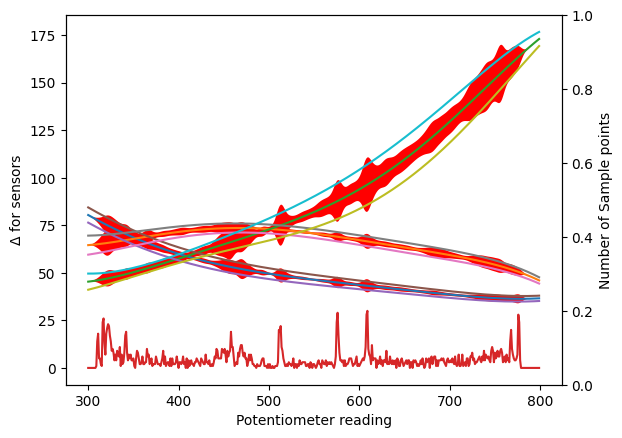

In [39]:
s0sp=np.polyfit(x,s0s,3,w=s0w)
s0spt=np.polynomial.Polynomial(np.flip(s0sp))(x)
s1sp=np.polyfit(x,s1s,3,w=s0w)
s1spt=np.polynomial.Polynomial(np.flip(s1sp))(x)
s2sp=np.polyfit(x,s2s,3,w=s0w)
s2spt=np.polynomial.Polynomial(np.flip(s2sp))(x)

fig , ax =plt.subplots()
ax.plot(x,s0pt)
ax.plot(x,s1pt)
ax.plot(x,s2pt)
ax.plot(x,s0w)
ax.fill_between(x,s0pt-(s0c*2),s0pt+(s0c*2),facecolor='red')
ax.fill_between(x,s1pt-(s1c*2),s1pt+(s1c*2),facecolor='red')
ax.fill_between(x,s2pt-(s2c*2),s2pt+(s2c*2),facecolor='red')
ax.plot(x,s0pt-s0spt*2)
ax.plot(x,s0pt+s0spt*2)
ax.plot(x,s1pt-s1spt*2)
ax.plot(x,s1pt+s1spt*2)
ax.plot(x,s2pt-s2spt*2)
ax.plot(x,s2pt+s2spt*2)
plt.xlabel('Potentiometer reading')
plt.ylabel('Δ for sensors')

# create the second y-axis
ax_i = ax.twinx()
ax_i.set_ylabel('Number of Sample points')
plt.show()


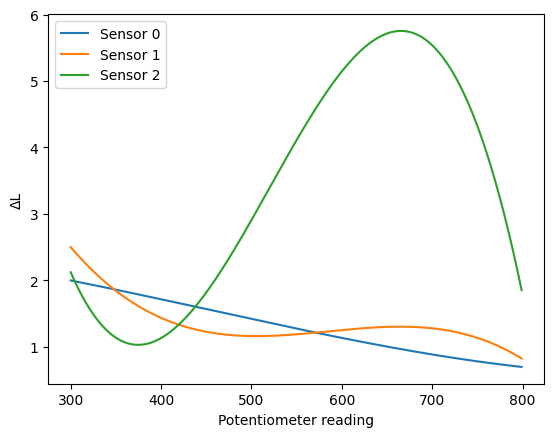

In [40]:
plt.plot(x,s0spt)
plt.plot(x,s1spt)
plt.plot(x,s2spt)
plt.legend(["Sensor 0","Sensor 1","Sensor 2"])
plt.xlabel('Potentiometer reading')
plt.ylabel('ΔL')
plt.show()

## Generate Lookup

### test for s0=20 s1=s2=50

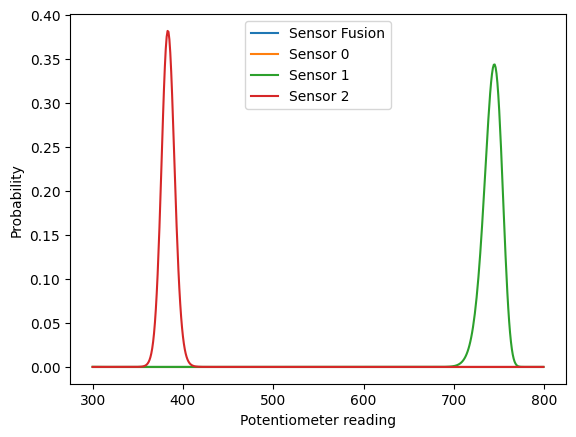

In [55]:

def prob(s,x,sig,mean):
    return 1/(np.sqrt(2*np.pi)*sig[x])*np.exp(-0.5*((s-mean[x])/sig[x])**2) 


test0=s0pt.copy()
test1=s0pt.copy()
test2=s0pt.copy()
test=s0pt.copy()
for i in range(xrange):
    test0[i]=prob(20,i,s0spt,s0pt)
    test1[i]=prob(55,i,s1spt,s1pt)
    test2[i]=prob(55,i,s2spt,s2pt)
    test[i]=test0[i]*test1[i]*test2[i]

plt.plot(x,test)
plt.plot(x,test0)
plt.plot(x,test1)
plt.plot(x,test2)
plt.legend(["Sensor Fusion","Sensor 0","Sensor 1","Sensor 2"])
plt.xlabel('Potentiometer reading')
plt.ylabel('Probability')
plt.show()


In [42]:
"""lookup=np.zeros((200,200,200))
for i0 in range(200):
    for i1 in range(200):
        for i2 in range(200):
            maxV=0
            maxX=0
            for i in range(500):
                tmp=prob(i0,i,s0spt,s0pt)*prob(i1,i,s1spt,s1pt)*prob(i2,i,s2spt,s2pt)
                if(tmp>maxV):
                    maxV=tmp
                    maxX=x[i]
            lookup[i0,i1,i2]=maxX

"""

'lookup=np.zeros((200,200,200))\nfor i0 in range(200):\n    for i1 in range(200):\n        for i2 in range(200):\n            maxV=0\n            maxX=0\n            for i in range(500):\n                tmp=prob(i0,i,s0spt,s0pt)*prob(i1,i,s1spt,s1pt)*prob(i2,i,s2spt,s2pt)\n                if(tmp>maxV):\n                    maxV=tmp\n                    maxX=x[i]\n            lookup[i0,i1,i2]=maxX\n\n'

In [43]:
# test lookup
"""res=t[0].copy()
for i in range(len(res)):
    res = lookup[s0[1][i],s1[1][i],s2[1][i]]

plt.plot(pot,res)
plt.show()"""

'res=t[0].copy()\nfor i in range(len(res)):\n    res = lookup[s0[1][i],s1[1][i],s2[1][i]]\n\nplt.plot(pot,res)\nplt.show()'

2 sigma 95%: +-761.7381719989647 => ~274.2257419196273deg


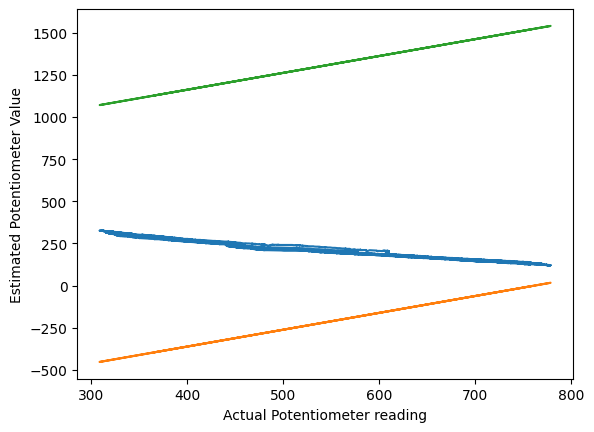

In [56]:
# without lookup

def calcValue(i0,i1,i2):
    maxV=0
    maxX=0
    for i in range(xrange):
        tmp=prob(i0,i,s0spt,s0pt)*prob(i1,i,s1spt,s1pt)*prob(i2,i,s2spt,s2pt)
        if(tmp>maxV):
            maxV=tmp
            maxX=x[i]
    return maxX


res=t[0].copy()
#for i in range(len(res)):
#    res[i] = calcValue(s0[1][i],s1[1][i],s2[1][i])

#calc 2 sigma
sig=np.sqrt(np.average((res-pot)**2))
print(f"2 sigma 95%: +-{sig*2} => ~{sig*2*180/500}deg")

fig,ax=plt.subplots()
ax.plot(pot,res)
ax.plot(pot,pot-2*sig)
ax.plot(pot,pot+2*sig)
plt.xlabel('Actual Potentiometer reading')
plt.ylabel('Estimated Potentiometer Value')
plt.show()

In [57]:
# generate gaussian lookup
from scipy.stats import norm


tmp0=np.zeros((300,xrange))
s0calP=np.zeros((300,3),dtype=np.double)
s0calPt=np.zeros((300,xrange),dtype=np.double)

tmp1=np.zeros((300,xrange))
s10calP=np.zeros((300,3),dtype=np.double)
s10calPt=np.zeros((300,xrange),dtype=np.double)
s11calP=np.zeros((300,3),dtype=np.double)
s11calPt=np.zeros((300,xrange),dtype=np.double)

splitPoint=np.argmax(s1pt)
print(x[splitPoint])

tmp2=np.zeros((300,xrange))
s2calP=np.zeros((300,3),dtype=np.double)
s2calPt=np.zeros((300,xrange),dtype=np.double)

y=np.arange(0,300)
for i in range (300):
    for i0 in range(xrange):
                tmp0[i][i0]=prob(i,i0,s0spt,s0pt)
                tmp1[i][i0]=prob(i,i0,s1spt,s1pt)
                tmp2[i][i0]=prob(i,i0,s2spt,s2pt)
    s0calP[i][1]=np.argmax(tmp0[i])
    s0calP[i][0]=np.sum(tmp0[i])
    if(s0calP[i][0]!=0):
        s0calP[i][2]=s0calP[i][0]/(np.max(tmp0[i])*np.sqrt(2*np.pi))
    for i0 in range(500):
        if(s0calP[i][2]!=0):
            s0calPt[i][i0]=s0calP[i][0]*1/(np.sqrt(2*np.pi)*s0calP[i][2])*np.exp(-0.5*((i0-s0calP[i][1])/s0calP[i][2])**2)

    s10calP[i][1]=np.argmax(tmp1[i][:splitPoint])
    s10calP[i][0]=np.sum(tmp1[i][:splitPoint])
    s11calP[i][1]=np.argmax(tmp1[i][splitPoint:])+splitPoint
    s11calP[i][0]=np.sum(tmp1[i][splitPoint:])

    if(s10calP[i][0]!=0):
        s10calP[i][2]=s10calP[i][0]/(tmp1[i][int(s10calP[i][1])]*np.sqrt(2*np.pi))
    if(s11calP[i][0]!=0):
        s11calP[i][2]=s11calP[i][0]/(tmp1[i][int(s11calP[i][1])]*np.sqrt(2*np.pi))

    
    for i0 in range(xrange):
        if(s10calP[i][2]!=0):
            s10calPt[i][i0]=s10calP[i][0]*1/(np.sqrt(2*np.pi)*s10calP[i][2])*np.exp(-0.5*((i0-s10calP[i][1])/s10calP[i][2])**2)
        if(s11calP[i][2]!=0):
            s11calPt[i][i0]=s11calP[i][0]*1/(np.sqrt(2*np.pi)*s11calP[i][2])*np.exp(-0.5*((i0-s11calP[i][1])/s11calP[i][2])**2)

    s2calP[i][1]=np.argmax(tmp2[i])
    s2calP[i][0]=np.sum(tmp2[i])
    if(s2calP[i][0]!=0):
        s2calP[i][2]=s2calP[i][0]/(np.max(tmp2[i])*np.sqrt(2*np.pi))
    for i0 in range(xrange):
        if(s2calP[i][2]!=0):
            s2calPt[i][i0]=s2calP[i][0]*1/(np.sqrt(2*np.pi)*s2calP[i][2])*np.exp(-0.5*((i0-s2calP[i][1])/s2calP[i][2])**2)




466


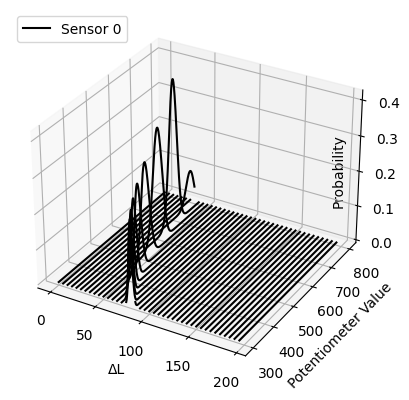

In [58]:
ax = plt.figure().add_subplot(projection='3d')
for i in range(0,200,5):
    ax.plot3D(np.ones(500)*i,x, tmp0[i], 'black')

ax.set_xlabel('ΔL')
ax.set_ylabel('Potentiometer Value')
ax.set_zlabel('Probability', labelpad=-30)  # Increase the labelpad to move the label further away from the axis

ax.zaxis.set_rotate_label(False)  # Disable automatic rotation of the z-axis label
ax.zaxis.label.set_verticalalignment('center')  # Center the z-axis label horizontally
ax.zaxis.label.set_rotation(90)  # Rotate the z-axis label vertically


ax.legend(['Sensor 0'], loc='upper left')


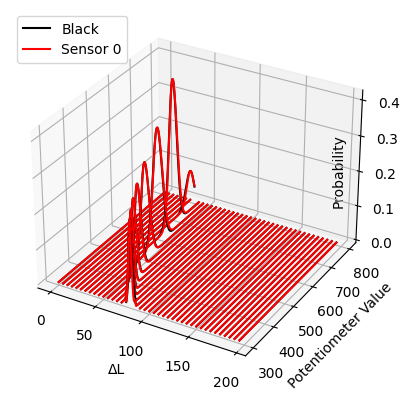

In [59]:
ax = plt.figure().add_subplot(projection='3d')
for i in range(0,200,5):
    ax.plot3D(np.ones(500)*i,x, tmp0[i], 'black')
    ax.plot3D(np.ones(500)*i,x, s0calPt[i], 'red')
ax.set_xlabel('ΔL')
ax.set_ylabel('Potentiometer Value')
ax.set_zlabel('Probability', labelpad=-30)  # Increase the labelpad to move the label further away from the axis

ax.zaxis.set_rotate_label(False)  # Disable automatic rotation of the z-axis label
ax.zaxis.label.set_verticalalignment('center')  # Center the z-axis label horizontally
ax.zaxis.label.set_rotation(90)  # Rotate the z-axis label vertically

ax.legend(['Black','Sensor 0'], loc='upper left')

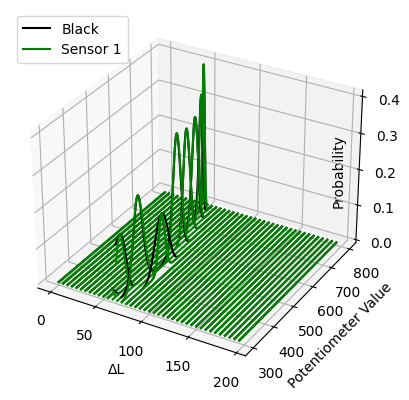

In [60]:
ax = plt.figure().add_subplot(projection='3d')
for i in range(0,200,5):
    ax.plot3D(np.ones(500)*i,x, tmp1[i], 'black')
    ax.plot3D(np.ones(500)*i,x, s10calPt[i], 'green')
    ax.plot3D(np.ones(500)*i,x, s11calPt[i], 'green')
ax.set_xlabel('ΔL')
ax.set_ylabel('Potentiometer Value')
ax.set_zlabel('Probability', labelpad=-30)  # Increase the labelpad to move the label further away from the axis

ax.zaxis.set_rotate_label(False)  # Disable automatic rotation of the z-axis label
ax.zaxis.label.set_verticalalignment('center')  # Center the z-axis label horizontally
ax.zaxis.label.set_rotation(90)  # Rotate the z-axis label vertically
ax.legend(['Black','Sensor 1'], loc='upper left')

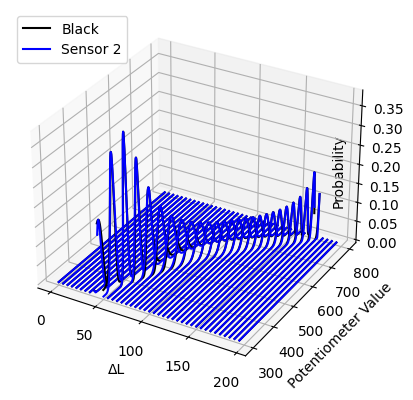

In [61]:
ax = plt.figure().add_subplot(projection='3d')
for i in range(0,200,5):
    ax.plot3D(np.ones(500)*i,x, tmp2[i], 'black')
    ax.plot3D(np.ones(500)*i,x, s2calPt[i], 'blue')
ax.set_xlabel('ΔL')
ax.set_ylabel('Potentiometer Value')
ax.set_zlabel('Probability', labelpad=-30)  # Increase the labelpad to move the label further away from the axis

ax.zaxis.set_rotate_label(False)  # Disable automatic rotation of the z-axis label
ax.zaxis.label.set_verticalalignment('center')  # Center the z-axis label horizontally
ax.zaxis.label.set_rotation(90)  # Rotate the z-axis label vertically
ax.legend(['Black','Sensor 2'], loc='upper left')

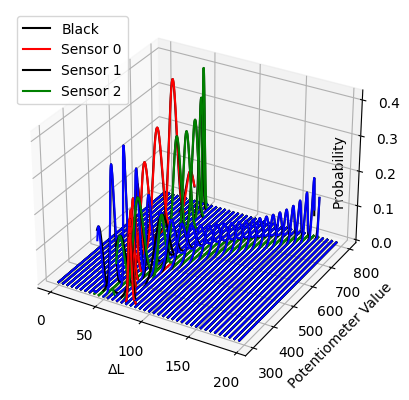

In [62]:

ax = plt.figure().add_subplot(projection='3d')
for i in range(0,200,5):
    ax.plot3D(np.ones(500)*i,x, tmp0[i], 'black')
    ax.plot3D(np.ones(500)*i,x, s0calPt[i], 'red')

    ax.plot3D(np.ones(500)*i,x, tmp1[i], 'black')
    ax.plot3D(np.ones(500)*i,x, s10calPt[i], 'green')
    ax.plot3D(np.ones(500)*i,x, s11calPt[i], 'green')

    ax.plot3D(np.ones(500)*i,x, tmp2[i], 'black')
    ax.plot3D(np.ones(500)*i,x, s2calPt[i], 'blue')

ax.set_xlabel('ΔL')
ax.set_ylabel('Potentiometer Value')
ax.set_zlabel('Probability', labelpad=-30)  # Increase the labelpad to move the label further away from the axis

ax.zaxis.set_rotate_label(False)  # Disable automatic rotation of the z-axis label
ax.zaxis.label.set_verticalalignment('center')  # Center the z-axis label horizontally
ax.zaxis.label.set_rotation(90)  # Rotate the z-axis label vertically

ax.legend(['Black','Sensor 0', 'Sensor 1', 'Sensor 2'], loc='upper left')

In [51]:
def calcValue2(s0,s1,s2):
    # get inital estimate
    mu0=s0calP[int(s0)][2]**2
    mu2=s2calP[int(s2)][2]**2
    m0=s0calP[int(s0)][1]
    m2=s2calP[int(s2)][1]
    mu=mu0+mu2
    mmu=(mu0)*m2+(mu2)*m0
    res=mmu/mu
    #select s1 side
    if(res<splitPoint):
        mu1=s10calP[int(s1)][2]**2
        m1=s10calP[int(s1)][1]
    else:
        mu1=s11calP[int(s1)][2]**2
        m1=s11calP[int(s1)][1]
    mu=mu0*mu1+mu0*mu2+mu1*mu2
    mmu=m2*mu0*mu1+m1*mu0*mu2+m0*mu1*mu2
    res2=mmu/mu
    return x[int(res2)]

2 sigma 95%: +-21.78168362081394 => ~7.841406103493018deg


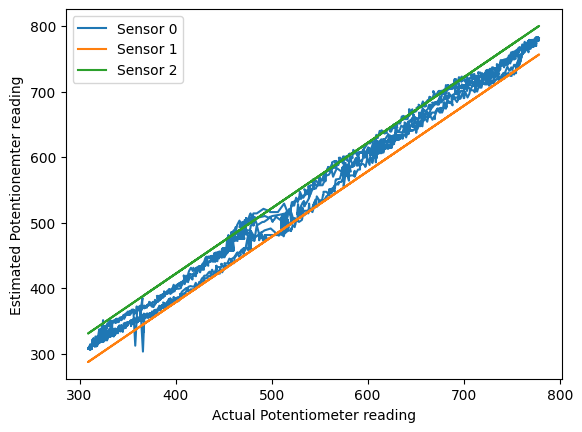

In [63]:
res=t[0].copy()
for i in range(len(res)):
    res[i] = calcValue2(s0[1][i],s1[1][i],s2[1][i])

#calc 2 sigma
sig=np.sqrt(np.average((res-pot)**2))
print(f"2 sigma 95%: +-{sig*2} => ~{sig*2*180/500}deg")

fig,ax=plt.subplots()
ax.plot(pot,res)
ax.plot(pot,pot-2*sig)
ax.plot(pot,pot+2*sig)
plt.legend(["Sensor 0","Sensor 1","Sensor 2"])
plt.xlabel('Actual Potentiometer reading')
plt.ylabel('Estimated Potentionemter reading')
plt.show()

# output calibration data

## Python

In [ ]:
def toString(arr):
    res="["
    for i in arr:
        res=res+str(i)+","
    res=res[:-1]+"]"
    return res

calP=""
calP=calP+"# Sensor0\n" + f"s0v={s0v}\ns0m={toString(s0calPt[1])}\ns0s={toString(s0calPt[1])}"
calP=calP+"# Sensor1\n" + f"split = {splitPoint}\ns1v={s1v}\ns10m={toString(s10calPt[1])}\ns10s={toString(s10calPt[1])}\ns11m={toString(s11calPt[1])}\ns11s={toString(s11calPt[1])}"
calP=calP+"# Sensor2\n" + f"s2v={s2v}\ns0m={toString(s2calPt[1])}\ns0s={toString(s2calPt[1])}"

f=open("calOut.py","w")
f.write(calP)
f.close()